# Assignment 3

In [2]:
# Import cell 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Exercise 1

### 1. a

This is the Marvok matrix: 
$$
\textbf{P} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0.9 & 0 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0.8 & 0 & 0.2 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0.7 & 0 & 0.3 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0.6 & 0 & 0.4 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0.4 & 0 & 0.6 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0.3 & 0 & 0.7 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.2 & 0 & 0.8\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.9\\
\end{bmatrix}
$$

In [1]:
probs = [(1, 0),(0.9, 0.1),(0.8, 0.2), (0.7, 0.3),\
         (0.6, 0.4), (0.5, 0.5), (0.4, 0.6), \
         (0.3, 0.7), (0.2, 0.8), (0.1, 0.9), ]

MM = {k:v for k,v in zip(range(1, 12), probs)}

print(f"The Marvok Matrix is the following:\n\n{MM}")

The Marvok Matrix is the following:

{1: (1, 0), 2: (0.9, 0.1), 3: (0.8, 0.2), 4: (0.7, 0.3), 5: (0.6, 0.4), 6: (0.5, 0.5), 7: (0.4, 0.6), 8: (0.3, 0.7), 9: (0.2, 0.8), 10: (0.1, 0.9)}


### 1. b

In [4]:
N = 10000
T = 1000
LEVELS = [i for i in range(2, 11)]
COLORS = ['lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen',\
          'lightskyblue', 'lightslategray', 'lime', 'lightsteelblue', 'lightyellow']

matrix = list()
    
for lev, color_name in zip(LEVELS, COLORS):
    
    
    sim_list = list()

    for _ in range(N):
        tot_numb_sales = 0
        actual_level = lev
        
        for i in range(T):
            if actual_level > 1: 
                u = np.random.random()
                if u >= MM[actual_level][0]:
                    tot_numb_sales += 1
                    actual_level += 1
                    if actual_level == 11:
                        actual_level = 10 
                else: 
                    actual_level -= 1

        sim_list.append(tot_numb_sales)
    matrix.append(sim_list)

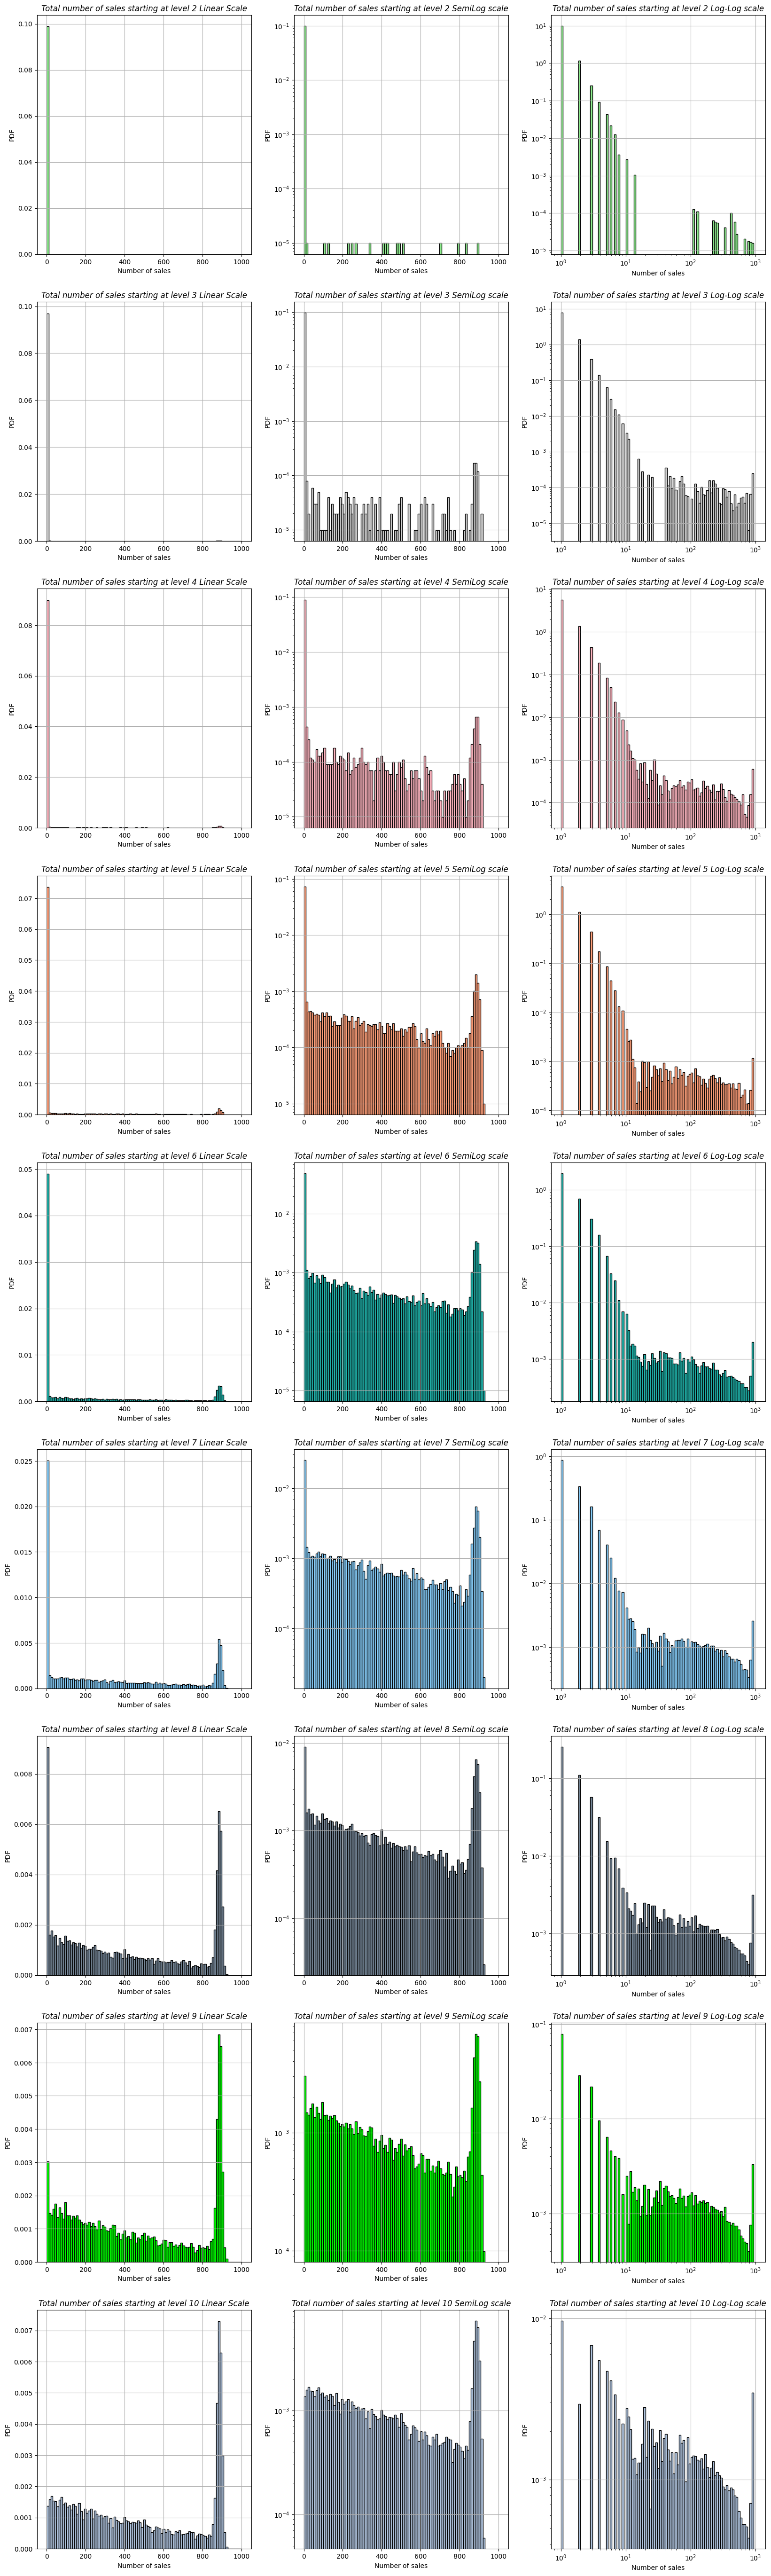

In [5]:
fig, axs = plt.subplots(9,3, figsize = (20, 70))

START_VALUE = 0 
STOP_VALUE = 1000
NUM_OF_BINS = 100


lin_bins = np.linspace(start = START_VALUE, stop= STOP_VALUE, num = NUM_OF_BINS)
log_bins = np.logspace(start = np.log10(1), stop= np.log10(1000), num = NUM_OF_BINS)

for i,(lev, color_name) in enumerate(zip(LEVELS,COLORS)): 
    # Linear    
    axs[lev-2, 0].hist(matrix[i], facecolor = color_name, edgecolor = "black", bins = lin_bins, linewidth = 1, density = True)
    axs[lev-2, 0].set_xlabel ('Number of sales', fontsize = 10)
    axs[lev-2, 0].set_ylabel ('PDF', fontsize = 10)
    #axs[lev-2, 0].set_xlim(min(sim_list), max(sim_list))
    axs[lev-2, 0].set_title(f'Total number of sales starting at level {lev} Linear Scale', fontstyle = 'italic')
    axs[lev-2, 0].grid()
    
    # Semi-log
    axs[lev-2, 1].hist(matrix[i], facecolor = color_name, edgecolor = "black", bins = lin_bins, linewidth = 1, density = True)
    axs[lev-2, 1].set_xlabel ('Number of sales', fontsize = 10)
    axs[lev-2, 1].set_ylabel ('PDF', fontsize = 10)
    axs[lev-2, 1].set_yscale('log')
    axs[lev-2, 1].set_title(f'Total number of sales starting at level {lev} SemiLog scale', fontstyle = 'italic')
    axs[lev-2, 1].grid()
    
    # Log-Log
    axs[lev-2, 2].hist(matrix[i], facecolor = color_name, edgecolor = "black", bins = log_bins, linewidth = 1, density = True)
    axs[lev-2, 2].set_xlabel ('Number of sales', fontsize = 10)
    axs[lev-2, 2].set_ylabel ('PDF', fontsize = 10)
    axs[lev-2, 2].set_xscale('log')
    axs[lev-2, 2].set_yscale('log')
    axs[lev-2, 2].set_title(f'Total number of sales starting at level {lev} Log-Log scale', fontstyle = 'italic')
    axs[lev-2, 2].grid()

### 1. c

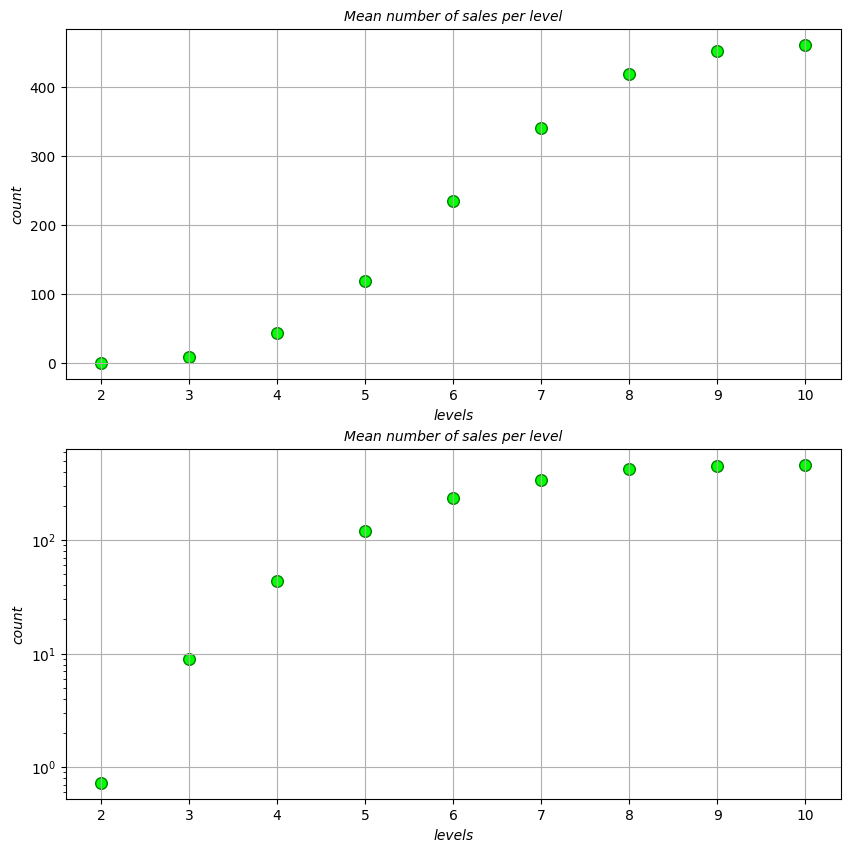

In [6]:
mean_sales = list()

fig, axs = plt.subplots(2, 1, figsize = (10,10))

for lev in LEVELS:
    sim_list = list()

    for _ in range(N):
        tot_numb_sales = 0
        actual_level = lev
        
        for i in range(T):
            if actual_level > 1: 
                u = np.random.random()
                if u >= MM[actual_level][0]:
                    tot_numb_sales += 1
                    actual_level += 1
                    if actual_level == 11:
                        actual_level = 10 
                else: 
                    actual_level -= 1

        sim_list.append(tot_numb_sales)
    mean_sales.append(np.mean(np.array(sim_list)))

axs[0].scatter(LEVELS, mean_sales, s = 70, facecolors = 'lime', edgecolors = 'g') 
axs[0].set_title('Mean number of sales per level', fontstyle = 'italic', fontsize = 10)
axs[0].set_xlabel ('levels', fontsize = 10, fontstyle = 'italic')
axs[0].set_ylabel ('count', fontsize = 10, fontstyle = 'italic')
axs[0].grid()

axs[1].scatter(LEVELS, mean_sales, s = 70, facecolors = 'lime', edgecolors = 'g') 
axs[1].set_title('Mean number of sales per level', fontstyle = 'italic', fontsize = 10)
axs[1].set_xlabel ('levels', fontsize = 10, fontstyle = 'italic')
axs[1].set_ylabel ('count', fontsize = 10, fontstyle = 'italic')
axs[1].set_yscale('log')
axs[1].grid()

### 1. d

In [7]:
N = 10000
T = 1000
LEVELS = [i for i in range(2, 11)]
COLORS = ['lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen',\
          'lightskyblue', 'lightslategray', 'lime', 'lightsteelblue', 'lightyellow']


matrix = list()
    
for lev, color_name in zip(LEVELS, COLORS):
    
    sim_list = list()

    for _ in range(N):
        
        tot_numb_sales = 0
        actual_level = lev
        
        for time_step in range(T):
            if actual_level > 1: 
                u = np.random.random()
                if u >= MM[actual_level][0]:
                    tot_numb_sales += 1
                    actual_level += 1
                    if actual_level == 11:
                        actual_level = 10 
                else: 
                    actual_level -= 1
            
            if tot_numb_sales == 5: 
                sim_list.append(time_step+1)
                break
                
    matrix.append(sim_list)

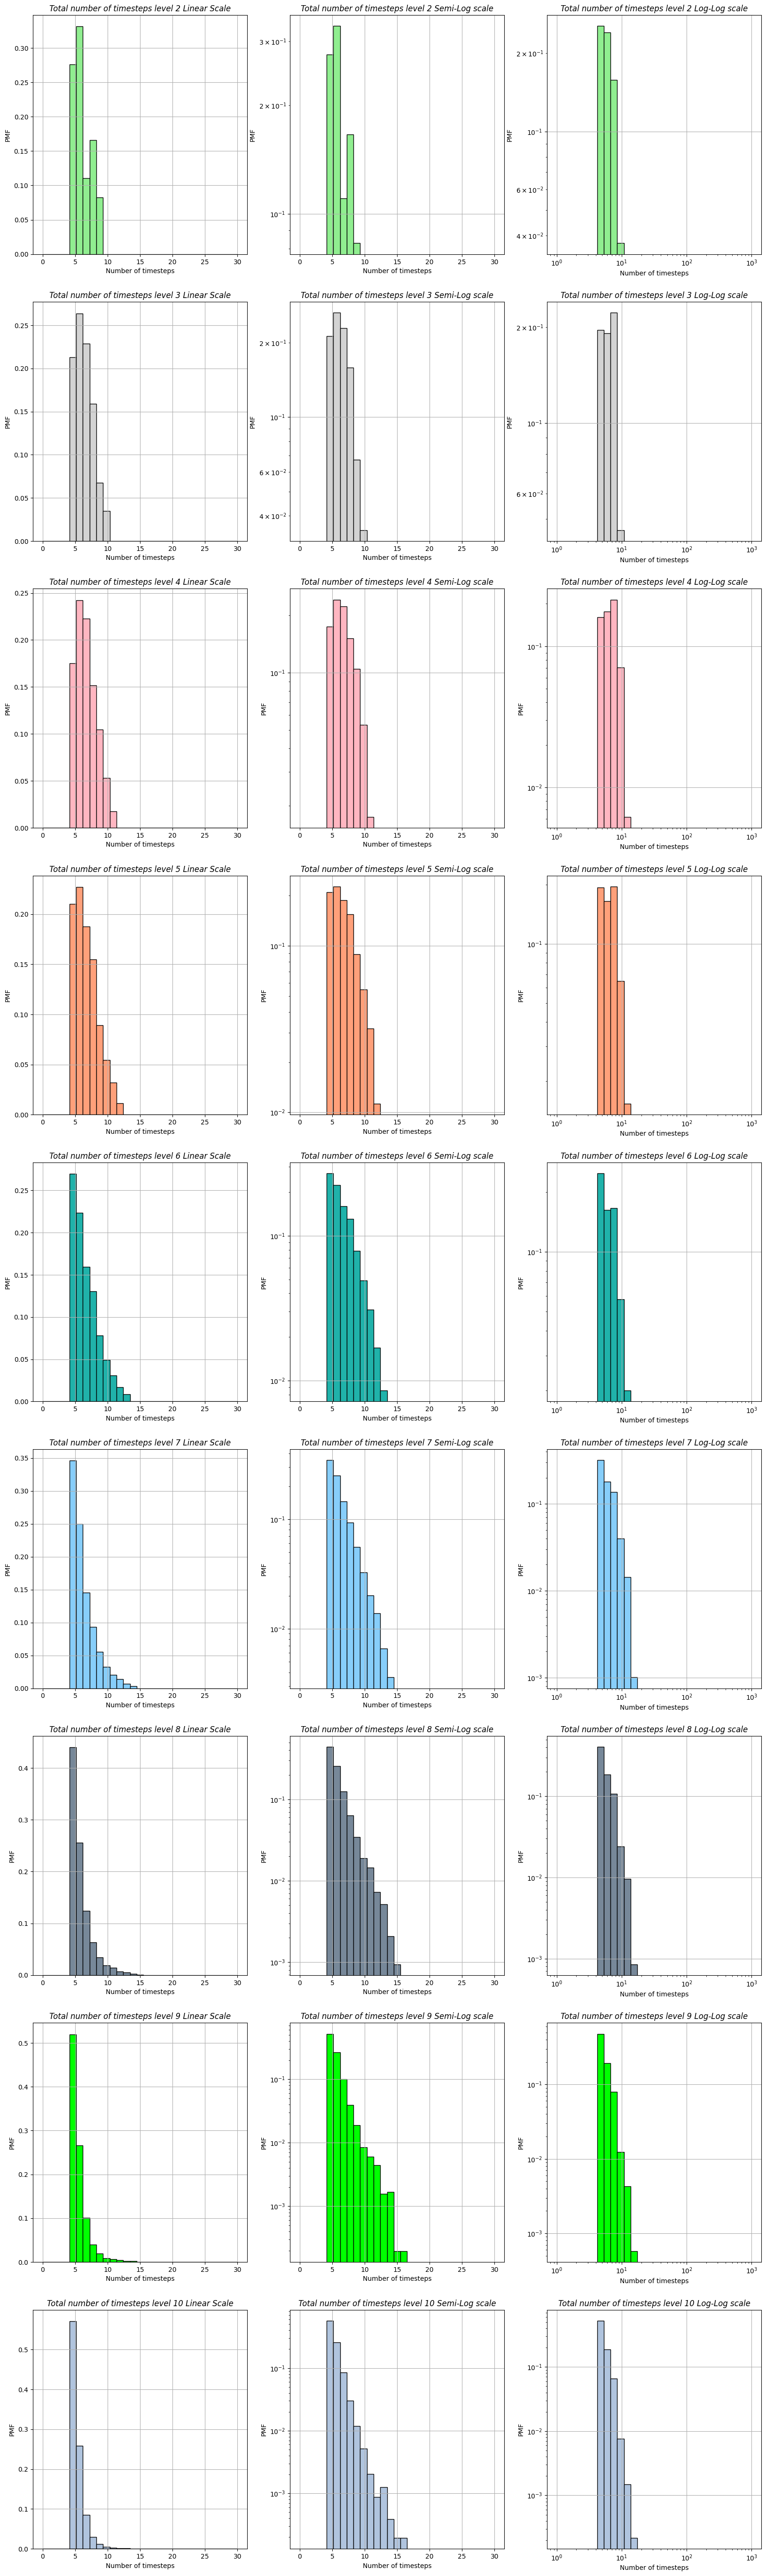

In [8]:
fig, axs = plt.subplots(9,3, figsize = (20, 70))

START_VALUE = 0
STOP_VALUE = 30
NUM_OF_BINS = 30


lin_bins = np.linspace(start = START_VALUE, stop= STOP_VALUE, num = NUM_OF_BINS)
log_bins = np.logspace(start = np.log10(1), stop= np.log10(1000), num = NUM_OF_BINS)

for i,(lev, color_name) in enumerate(zip(LEVELS,COLORS)):
    # Linear    
    axs[lev-2, 0].hist(matrix[i], facecolor = color_name, edgecolor = "black", bins = lin_bins, linewidth = 1, density = True)
    axs[lev-2, 0].set_xlabel ('Number of timesteps', fontsize = 10)
    axs[lev-2, 0].set_ylabel ('PMF', fontsize = 10)
    #axs[lev-2, 0].set_xlim(min(matrix[i]), max(matrix[i]))
    axs[lev-2, 0].set_title(f'Total number of timesteps level {lev} Linear Scale', fontstyle = 'italic')
    axs[lev-2, 0].grid()
    
    # Semi-log
    axs[lev-2, 1].hist(matrix[i], facecolor = color_name, edgecolor = "black",  bins = lin_bins, linewidth = 1, density = True)
    axs[lev-2, 1].set_xlabel ('Number of timesteps', fontsize = 10)
    axs[lev-2, 1].set_ylabel ('PMF', fontsize = 10)
    axs[lev-2, 1].set_yscale('log')
    axs[lev-2, 1].set_title(f'Total number of timesteps level {lev} Semi-Log scale', fontstyle = 'italic')
    axs[lev-2, 1].grid()
    
    # Log-Log
    axs[lev-2, 2].hist(matrix[i], facecolor = color_name, edgecolor = "black", bins = log_bins, linewidth = 1, density = True)
    axs[lev-2, 2].set_xlabel ('Number of timesteps', fontsize = 10)
    axs[lev-2, 2].set_ylabel ('PMF', fontsize = 10)
    axs[lev-2, 2].set_xscale('log')
    axs[lev-2, 2].set_yscale('log')
    axs[lev-2, 2].set_title(f'Total number of timesteps level {lev} Log-Log scale', fontstyle = 'italic')
    axs[lev-2, 2].grid()

### 1.e

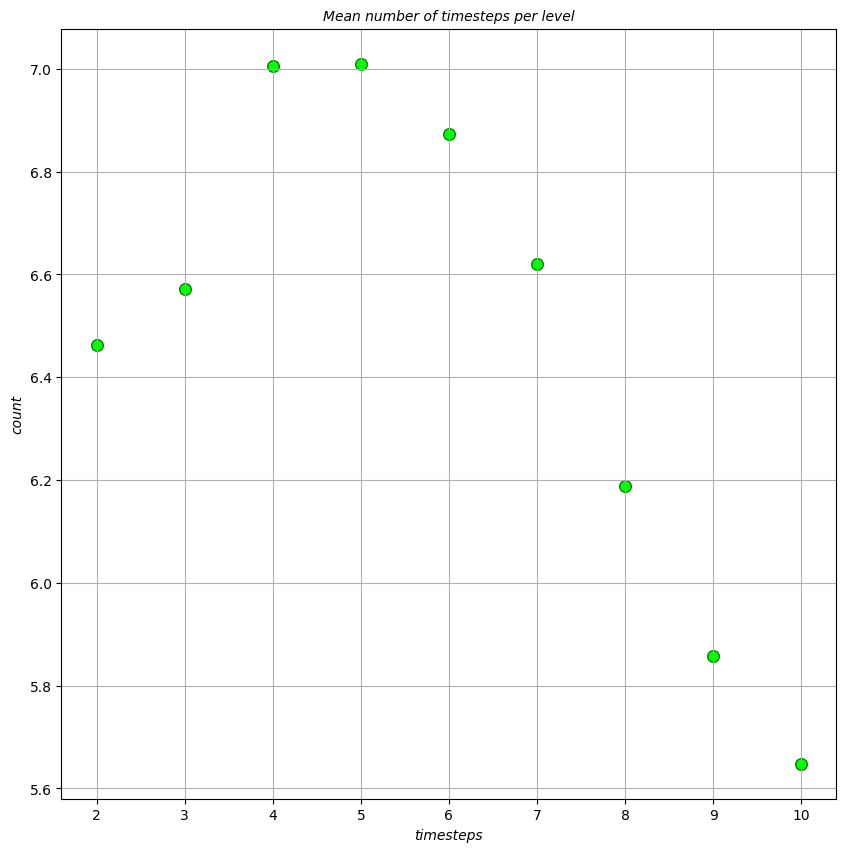

In [9]:
mean_times = list()

fig, axs = plt.subplots(figsize = (10,10))

for lev in LEVELS:
    sim_list = list()
    
    for _ in range(N):    
        tot_numb_sales = 0
        actual_level = lev
        
        for time_step in range(T):
            if actual_level > 1: 
                u = np.random.random()
                if u >= MM[actual_level][0]:
                    tot_numb_sales += 1
                    actual_level += 1
                    if actual_level == 11:
                        actual_level = 10 
                else: 
                    actual_level -= 1
            
            if tot_numb_sales == 5: 
                sim_list.append(time_step+1)
                break

    mean_times.append(np.mean(np.array(sim_list)))

axs.scatter(LEVELS, mean_times, s = 70, facecolors = 'lime', edgecolors = 'g') 
axs.set_title('Mean number of timesteps per level', fontstyle = 'italic', fontsize = 10)
axs.set_xlabel ('timesteps', fontsize = 10, fontstyle = 'italic')
axs.set_ylabel ('count', fontsize = 10, fontstyle = 'italic')
axs.grid()

### 1.f

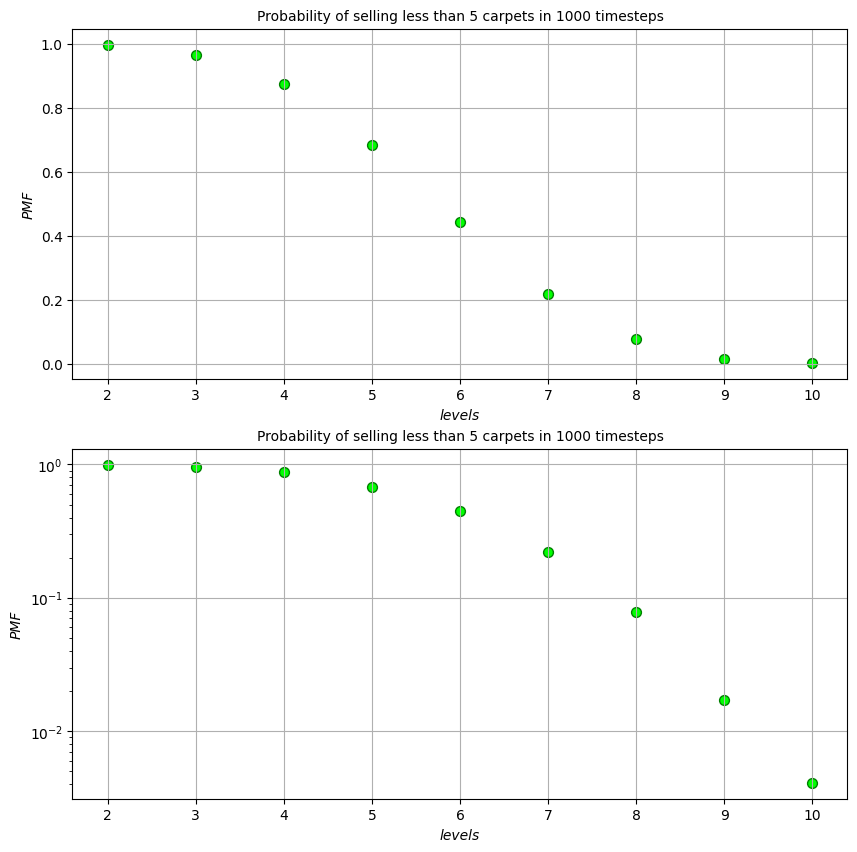

In [10]:
times = [(N-len(matrix[i]))/N for i in range(9)]

fig, axs = plt.subplots(2, 1, figsize = (10,10))

axs[0].scatter(LEVELS, times, s = 50, facecolors = 'lime', edgecolors = 'g') 
axs[0].set_title(f'Probability of selling less than 5 carpets in {T} timesteps', fontsize = 10)
axs[0].set_xlabel ('levels', fontsize = 10, fontstyle = 'italic')
axs[0].set_ylabel ('PMF', fontsize = 10, fontstyle = 'italic')
axs[0].grid()

axs[1].scatter(LEVELS, times, s = 50, facecolors = 'lime', edgecolors = 'g') 
axs[1].set_title(f'Probability of selling less than 5 carpets in {T} timesteps', fontsize = 10)
axs[1].set_xlabel ('levels', fontsize = 10, fontstyle = 'italic')
axs[1].set_ylabel ('PMF', fontsize = 10, fontstyle = 'italic')
axs[1].set_yscale("log")
axs[1].grid()

### 1.g

At sufficiently high initial levels of excitement, the PMFs should start showing
a definite functional form, a **Geometric Distribution**, which is basically a discrete exponential distribution. Since the Markov chains have the Markov Property: $P(S_{t+1}|S_t) = P(S_{t+1}|S_0, \ldots, S_{t})$, it can be viewed as a **memory less** system. It is well known that the exponential has the same property.

## Exercise 2

I decided to use the procedure that I was presented in Lecture 3.

The distribution of the time between two successes of the Poisson distribution follows an **exponential distribution** with a scaling factor that depends by the number of nuclei that still do not decay. 
Specifically the scaling factor of the exponential is: $\frac{1}{\lambda} \times \frac{1}{n}$, where n is the remaing nucleis.

That is given by the following result: 
\begin{aligned}
\frac{N_{0}}{2} = N_{0}e^{-\lambda t_{0.5}} \Rightarrow \frac{1}{2}= e^{-\lambda t_{0.5}} \Rightarrow \lambda t_{0.5}= \ln(2) \Rightarrow t_{0.5}=\ln(2) = 3.465
\end{aligned}



In [11]:
N_0 = 10000
NR_SIMULATIONS = 100
LAMBDA = 0.2

times = list()
for i in range(NR_SIMULATIONS):
    time = np.sum(np.array([np.random.exponential(scale= (1/LAMBDA)/(N-n)) for n in range(int(N_0/2))]))
    times.append(time)
times = np.array(times)

mean = np.mean(times)
var = np.var(times)

print(f"The mean of the half-time is: {mean:.3f}\n")
print(f"The variance of the half-time is: {var:.4f}")

The mean of the half-time is: 3.469

The variance of the half-time is: 0.0029


The time for the decay of just one atom is distributed as $Exp(N\lambda)$. We obtain this because each atom $X_{i}\sim Exp(\lambda)$ and all atoms are **indipendent**. So, the time for the first nucleo to decay is $min(X_{1},\dots,X_{N})=Exp(\sum_{i = 1}^{N} \lambda_{i})=Exp(N\lambda)$